In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

/data/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


## variable

初始化变量

In [4]:
x = tf.Variable([1, 2])
a = tf.constant([3, 3])

add = tf.add(x, a)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(add))

[4 5]


变量赋值

In [8]:
state = tf.Variable(0, name='counter')
iters = tf.add(state, 1)
update = tf.assign(state, iters)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


## Fetch & feed

In [9]:
#fetch可以执行多个操作
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
add = tf.add(input1, input2)
mul = tf.multiply(input1, input2)
with tf.Session() as sess:
    result = sess.run([add, mul])
    print (result)

[5.0, 6.0]


In [10]:
#feed可以在运行的时候传入值
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[0.5], input2:[0.4]}))

[0.2]


## demo example

In [15]:
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2

#构造一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b
loss = tf.reduce_mean(tf.square(y_data - y))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)
#init
init = tf.global_variables_initializer()
#run
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if(step % 20 == 0):
            print(step, sess.run([k, b]))


(0, [0.05746142, 0.101494886])
(20, [0.10650051, 0.19629987])
(40, [0.10413487, 0.19764642])
(60, [0.10263014, 0.19850293])
(80, [0.101673, 0.19904773])
(100, [0.10106417, 0.19939427])
(120, [0.10067691, 0.1996147])
(140, [0.10043056, 0.19975492])
(160, [0.10027386, 0.1998441])
(180, [0.10017419, 0.19990085])


## Linear regression

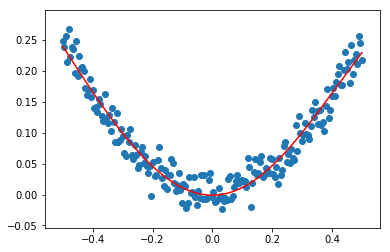

In [22]:
#生成样本点
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise
#network
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

#L1
w1 = tf.Variable(tf.random_normal([1, 10]))
b1 = tf.Variable(tf.zeros([1, 10]))
a1 = tf.matmul(x, w1) + b1
L1 = tf.tanh(a1)

#L2
w2 = tf.Variable(tf.random_normal([10, 1]))
b2 = tf.Variable(tf.zeros([1, 1]))
a2 = tf.matmul(L1, w2) + b2
out = tf.tanh(a2)

#train
loss = tf.reduce_mean(tf.square(out - y_data))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for _ in range(2000):
            sess.run(train, feed_dict={x:x_data, y:y_data})
        
        predict_v = sess.run(out, feed_dict={x:x_data})
        
        #draw
        plt.figure()
        plt.scatter(x_data, y_data)
        plt.plot(x_data, predict_v, 'r-')
        plt.show()


## MNIST

最小二乘和交叉熵两种loss

In [5]:
mnist = input_data.read_data_sets("../MNIST/MNIST_data", one_hot=True)
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

#network
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
predict = tf.nn.softmax(tf.matmul(x, w) + b)
#两种loss,最小二乘和交叉熵
#loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=predict))
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#run
init = tf.global_variables_initializer()
correct_predict = tf.equal(tf.argmax(y, 1), tf.argmax(predict, 1))  #argmax返回最大值的位置
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        auc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter: "+str(epoch) +", accuracy: "+str(auc))

Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0, accuracy: 0.5487
Iter: 1, accuracy: 0.6145
Iter: 2, accuracy: 0.7047
Iter: 3, accuracy: 0.7683
Iter: 4, accuracy: 0.7904


drop-out & init
![image.png](attachment:image.png)

In [47]:
mnist = input_data.read_data_sets("../MNIST/MNIST_data", one_hot=True)
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

#network
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.truncated_normal([784, 400], stddev=0.1))
b1 = tf.Variable(tf.zeros([400]) + 0.1)
L1 = tf.tanh(tf.matmul(x, w1) + b1)
L1_drop = tf.nn.dropout(L1, keep_prob)

w2 = tf.Variable(tf.truncated_normal([400, 400], stddev=0.1))
b2 = tf.Variable(tf.zeros([400]) + 0.1)
L2 = tf.tanh(tf.matmul(L1_drop, w2) + b2)
L2_drop = tf.nn.dropout(L2, keep_prob)

w3 = tf.Variable(tf.truncated_normal([400, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]) + 0.1)
predict = tf.nn.softmax(tf.matmul(L2_drop, w3) + b3)

#两种loss,最小二乘和交叉熵
#loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=predict))
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#run
init = tf.global_variables_initializer()
correct_predict = tf.equal(tf.argmax(y, 1), tf.argmax(predict, 1))  #argmax返回最大值的位置
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(30):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:batch_xs, y:batch_ys,keep_prob:0.5})
        test_acc = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels, keep_prob:0.5})
        train_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:0.5})
        print("Iter: "+str(epoch) +", test_acc: "+str(test_acc) + ", train_acc: "+ str(train_acc))

Extracting D:\workPlace\python\MNIST\MNIST_data\/train-images-idx3-ubyte.gz
Extracting D:\workPlace\python\MNIST\MNIST_data\/train-labels-idx1-ubyte.gz
Extracting D:\workPlace\python\MNIST\MNIST_data\/t10k-images-idx3-ubyte.gz
Extracting D:\workPlace\python\MNIST\MNIST_data\/t10k-labels-idx1-ubyte.gz
Iter: 0, test_acc: 0.411, train_acc: 0.4158
Iter: 1, test_acc: 0.5667273, train_acc: 0.5739
Iter: 2, test_acc: 0.64525455, train_acc: 0.6563
Iter: 3, test_acc: 0.7175091, train_acc: 0.7213
Iter: 4, test_acc: 0.75714546, train_acc: 0.7631
Iter: 5, test_acc: 0.7824182, train_acc: 0.7949
Iter: 6, test_acc: 0.7994, train_acc: 0.8099
Iter: 7, test_acc: 0.81094545, train_acc: 0.8208
Iter: 8, test_acc: 0.8232727, train_acc: 0.8294
Iter: 9, test_acc: 0.8293273, train_acc: 0.8411
Iter: 10, test_acc: 0.83216363, train_acc: 0.8412
Iter: 11, test_acc: 0.8421636, train_acc: 0.8476
Iter: 12, test_acc: 0.84385455, train_acc: 0.8489
Iter: 13, test_acc: 0.84647274, train_acc: 0.8531
Iter: 14, test_acc: 0.8

## CNN

In [ ]:
mnist = input_data.read_data_sets('../MNIST/MNIST_data', one_hot=True)

#定义批从
batch_size = 100
n_batchs = mnist.train.num_examples // batch_size

#初始化权重
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

#初始化偏置
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#卷积层
def conv2d(x, W):
    #input tensor [batch, in_height, in_width, in_channels]
    #strides : 步长 strides[0]=strides[3]=1, strides[1]:x步长， strides[2]:y 步长
    #padding "SAME" "VALID"
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#池化层
def max_pool_2x2(x):
    #ksize [1, x, y, 1]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#nn
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#CNN需要2维数据 [batch, height, width, channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

#L1
w_conv1 = weight_variable([5, 5, 1, 32]) # 5 * 5的窗口，从一个平面上抽32个平面
b_conv1 = bias_variable([32])  #每个平面加一个bias
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)  #x_image和权值向量卷积，加上偏置，再加relu
h_pool1 = max_pool_2x2(h_conv1)   #池化

#L2
w_conv2 = weight_variable([5, 5, 32, 64]) # 5 * 5的窗口，从一个平面上抽32个平面
b_conv2 = bias_variable([64])  #每个平面加一个bias
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#1st:28*28 卷积后:28*28, 池化后：14*14
#2nd:14*14  卷积后:14*14, 池化后: 7*7
#最后得到 64张 7*7 的平面

#全连接层
#L1
w_fc_1 = weight_variable([7*7*64, 1024])  #把7*7*64的结果平铺为1层
b_fc_1 = weight_variable([1024])
drop_out = tf.placeholder(tf.float32)  #dropout

h_pool2_1d = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc_out_1 = tf.nn.relu(tf.matmul(h_pool2_1d, w_fc_1) + b_fc_1)
L1_drop = tf.nn.dropout(h_fc_out_1, drop_out)

#L2
w_fc_2 = weight_variable([1024, 10])
b_fc_2 = bias_variable([10])

#train
predict = tf.nn.softmax(tf.matmul(L1_drop, w_fc_2) + b_fc_2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predict))
train = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_predict = tf.equal(tf.argmax(predict, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

#run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(20):
        for batch in range(n_batchs):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:batch_xs, y:batch_ys, drop_out:0.7})
        
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y: mnist.test.labels, drop_out:1.0})
        print("Iter: " + str(epoch)+" acc: "+ str(acc))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Iter: 0 acc: 0.867
Iter: 1 acc: 0.9692
Iter: 2 acc: 0.9789
Iter: 3 acc: 0.98

## tensorboard

In [1]:
mnist = input_data.read_data_sets('../MNIST/MNIST_data', one_hot=True)

#定义批从
batch_size = 100
n_batchs = mnist.train.num_examples // batch_size

#参数
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.scalar('histogram', var)

#初始化权重
def weight_variable(shape, name):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name=name)

#初始化偏置
def bias_variable(shape, name):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name=name)

#卷积层
def conv2d(x, W):
    #input tensor [batch, in_height, in_width, in_channels]
    #strides : 步长 strides[0]=strides[3]=1, strides[1]:x步长， strides[2]:y 步长
    #padding "SAME" "VALID"
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#池化层
def max_pool_2x2(x):
    #ksize [1, x, y, 1]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

with tf.name_scope('input'):
    #nn
    x = tf.placeholder(tf.float32, [None, 784], name='x_input')
    y = tf.placeholder(tf.float32, [None, 10], name='y_input')
    with tf.name_scope("x_image"):
    #CNN需要2维数据 [batch, height, width, channels]
        x_image = tf.reshape(x, [-1, 28, 28, 1], name='x_image')

#L1
with tf.name_scope('conv1'):
    #初始化weight和bias
    with tf.name_scope('w_conv1'):
        w_conv1 = weight_variable([5, 5, 1, 32], name='w_conv1') # 5 * 5的窗口，从一个平面上抽32个平面
    with tf.name_scope('b_conv1'):
        b_conv1 = bias_variable([32], name='b_conv1')  #每个平面加一个bias
    #卷积
    with tf.name_scope('conv2d_1'):
        conv2d_1 = conv2d(x_image, w_conv1) + b_conv1  #x_image和权值向量卷积，加上偏置，再加relu
    with tf.name_scope('relu'):
        h_conv1 = tf.nn.relu(conv2d_1)
    #池化
    with tf.name_scope('h_pool1'):
        h_pool1 = max_pool_2x2(h_conv1)   #池化

#L2
with tf.name_scope('conv2'):
    #初始化weight & bias
    with tf.name_scope('w_conv2'):
        w_conv2 = weight_variable([5, 5, 32, 64], name='w_conv2') # 5 * 5的窗口，从一个平面上抽32个平面
    with tf.name_scope('b_conv2'):
        b_conv2 = bias_variable([64], name='b_conv2')  #每个平面加一个bias
    #卷积
    with tf.name_scope('conv2d_2'):
        conv2d_2 = conv2d(h_pool1, w_conv2) + b_conv2
    with tf.name_scope('relu'):
        h_conv2 = tf.nn.relu(conv2d_2)
    #池化
    with tf.name_scope('h_pool2'):
        h_pool2 = max_pool_2x2(h_conv2)

#1st:28*28 卷积后:28*28, 池化后：14*14
#2nd:14*14  卷积后:14*14, 池化后: 7*7
#最后得到 64张 7*7 的平面

#全连接层
with tf.name_scope('fc1'):
#L1
    #初始化weight & bias
    with tf.name_scope('w_fc1'):
        w_fc_1 = weight_variable([7*7*64, 1024], name='w_fc1')  
    with tf.name_scope('b_fc1'):
        b_fc_1 = weight_variable([1024], name='b_fc1')
    #把7*7*64的结果平铺为1层
    with tf.name_scope('h_pool_flat1'):  
        h_pool2_1d = tf.reshape(h_pool2, [-1, 7 * 7 * 64], name='h_pool_flat1')
    #tanh(wx + b)
    with tf.name_scope('fc_out'):
        h_fc_a_1 = tf.matmul(h_pool2_1d, w_fc_1) + b_fc_1
    with tf.name_scope('relu'):
        h_fc_out_1 = tf.nn.relu(h_fc_a_1)
    #加一层drop-out
    with tf.name_scope('drop_out'):
        drop_out = tf.placeholder(tf.float32, name='dropout')  #dropout
    with tf.name_scope('out_1'):
        L1_drop = tf.nn.dropout(h_fc_out_1, drop_out, name='out_1')

#L2
with tf.name_scope('fc2'):
    #初始化weight & bias
    with tf.name_scope('w_fc2'):
        w_fc_2 = weight_variable([1024, 10], name='w_fc2')
    with tf.name_scope('b_fc2'):
        b_fc_2 = bias_variable([10], name='b_fc2')
    # softmax(w*x + b)
    with tf.name_scope('fc_out2'):
        h_fc_out_2 = tf.matmul(L1_drop, w_fc_2) + b_fc_2
    with tf.name_scope('softmax'):
        predict = tf.nn.softmax(h_fc_out_2)

#loss function
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predict), name='cross_entropy')
    tf.summary.scalar('cross_entroy', cross_entropy)
with tf.name_scope('train'):
    train = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_predict'):
        correct_predict = tf.equal(tf.argmax(predict, 1), tf.argmax(y, 1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))
        tf.summary.scalar('accuracy', accuracy)
        
merge = tf.summary.merge_all()
        
#run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('logs/train', sess.graph)
    test_writer = tf.summary.FileWriter('logs/test', sess.graph)
    for epoch in range(200):
        #train
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys, drop_out:0.7})

        summary = sess.run(merge, feed_dict={x:batch_xs, y:batch_ys, drop_out:0.7})
        train_writer.add_summary(summary, epoch)
        #test
        batch_xs, batch_ys = mnist.test.next_batch(batch_size)            
        summary = sess.run(merge, feed_dict={x:batch_xs, y:batch_ys, drop_out:0.7})
        test_writer.add_summary(summary, epoch)

        if(epoch % 100 ==0):
            test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y: mnist.test.labels, drop_out:1.0})
            train_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y: mnist.test.labels, drop_out:1.0})
            print("Iter: " + str(epoch)+" test acc: "+ str(test_acc) + " train acc: " + str(train_acc))


NameError: name 'input_data' is not defined

### RNN

In [ ]:
mnist = input_data.read_data_sets('../MNIST/MNIST_data', one_hot=True)
tf.reset_default_graph()
#图片是28*28
n_input = 28 #一行，一行有28个数据
max_time = 28 #一共28行
lstm_size =100 #隐藏单元
n_classes = 10 #10个分类
batch_size = 50 #每批次50个样本
n_batch = mnist.train.num_examples //  batch_size #计算批次

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])  #标签

weights = tf.Variable(tf.truncated_normal([lstm_size, n_classes], stddev = 0.1))
bias = tf.Variable(tf.constant(0.1, shape=[n_classes]))

#定义RNN
def RNN1(X, weights, bias):
    inputs = tf.reshape(X, [-1, max_time, n_input])
    lstm_cell = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    # final_state[0]是cell state
    # final_state[1]是hidden state
    outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, inputs, dtype = tf.float32)
    results = tf.nn.softmax(tf.matmul(final_state[1], weights) + bias)
    return results

#RNN的结果
prediction = RNN1(x, weights, bias)
#损失函数
cross_entroy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
#train
train = tf.train.AdamOptimizer(1e-4).minimize(cross_entroy)
#结果放在bool类型中
correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(prediction, 1))
#准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#初始化
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(6):
        for batch in range(n_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:batch_x, y:batch_y})
        
        acc = sess.run(accuracy, feed_dict={x:batch_x, y:batch_y})
        print("Iter: "+str(epoch)+", test acc: "+str(acc))

Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0, test acc: 0.58
Iter: 1, test acc: 0.84
Iter: 2, test acc: 0.88
Iter: 3, test acc: 0.92
Iter: 5, test acc: 0.96


### model_save

#### save

In [7]:
mnist = input_data.read_data_sets("../MNIST/MNIST_data", one_hot=True)
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

#network
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
predict = tf.nn.softmax(tf.matmul(x, w) + b)
#两种loss,最小二乘和交叉熵
#loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=predict))
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#run
init = tf.global_variables_initializer()
correct_predict = tf.equal(tf.argmax(y, 1), tf.argmax(predict, 1))  #argmax返回最大值的位置
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        auc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter: "+str(epoch) +", accuracy: "+str(auc))
        
    #save
    saver.save(sess, 'models/mnist_model_save.ckpt')

Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz
Iter: 0, accuracy: 0.5479
Iter: 1, accuracy: 0.6138
Iter: 2, accuracy: 0.7031
Iter: 3, accuracy: 0.765
Iter: 4, accuracy: 0.7906


#### load

In [3]:
mnist = input_data.read_data_sets("../MNIST/MNIST_data", one_hot=True)
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

#network
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
predict = tf.nn.softmax(tf.matmul(x, w) + b)
#两种loss,最小二乘和交叉熵
#loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=predict))
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

#run
init = tf.global_variables_initializer()
correct_predict = tf.equal(tf.argmax(y, 1), tf.argmax(predict, 1))  #argmax返回最大值的位置
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    saver.restore(sess, 'models/mnist_model_save.ckpt')
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz
0.098
INFO:tensorflow:Restoring parameters from models/mnist_model_save.ckpt
0.098


In [4]:
tf.__version__

'1.7.0'